In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [51]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

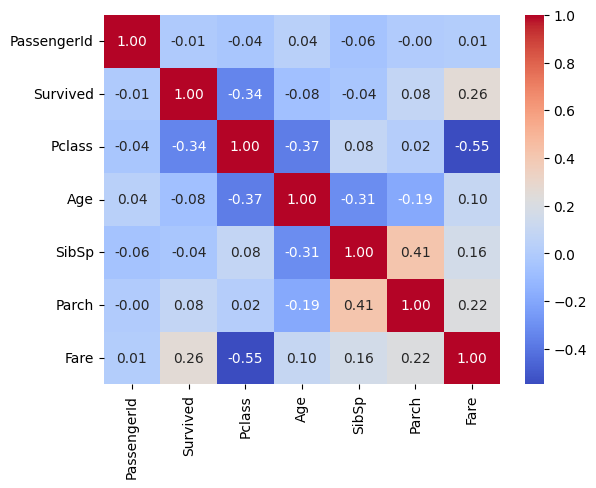

In [54]:
train_numeric_cols = train.select_dtypes(include=['number'])
corr_matrix = train_numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [55]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [57]:
missing_values_per_column = train.isna().sum()
print(missing_values_per_column)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Data preprocessing

In [58]:
# Replacing NaN values

mean_age = train['Age'].mean()
train['Age'] = train['Age'].fillna(mean_age)

most_frequent_cabin_val = train['Cabin'].mode()[0]
train['Cabin'] = train['Cabin'].fillna(str(most_frequent_cabin_val[:4]))

most_frequent_embarked_val = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(most_frequent_cabin_val)

Text(0.5, 1.0, 'Before outlier removal')

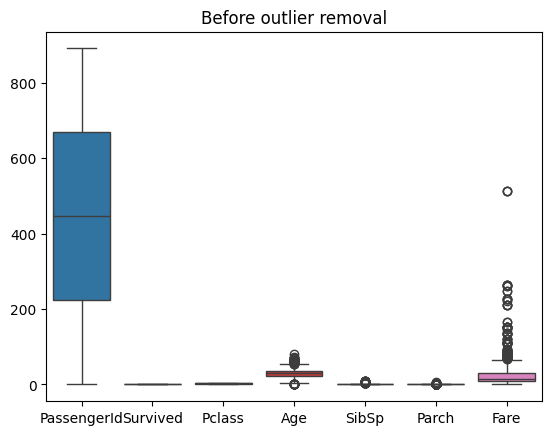

In [59]:
sns.boxplot(data=train)
plt.title("Before outlier removal")

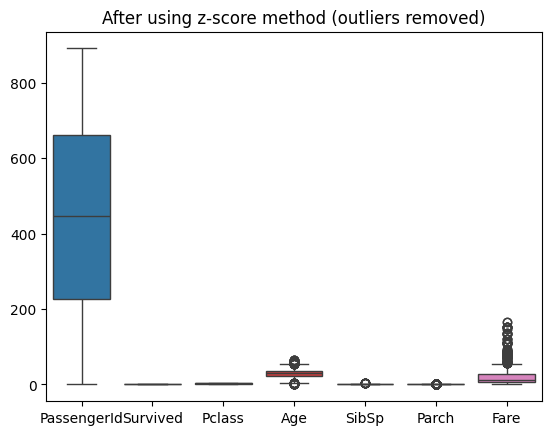

In [60]:
# Outlier removal using z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(train.select_dtypes(include=[np.number])))
outliers = (z_scores > 3)  

train_zscore = train[~outliers.any(axis=1)]  

sns.boxplot(data=train_zscore)
plt.title("After using z-score method (outliers removed)")
plt.show()

After removal: 
577


Text(0.5, 1.0, 'After using IQR method')

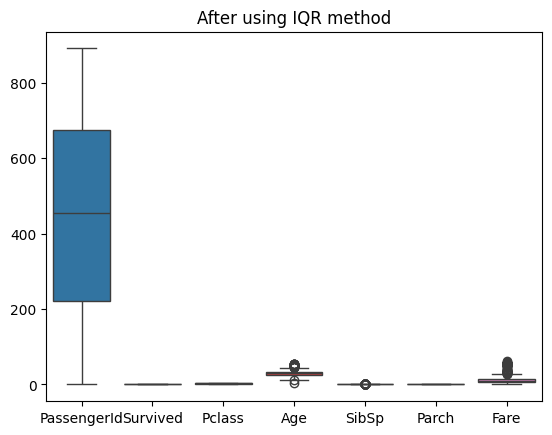

In [61]:
# Determining outliers using IQR method
numeric_train = train.select_dtypes(include=['number'])

Q1 = numeric_train.quantile(0.25)
Q3 = numeric_train.quantile(0.75)
IQR = Q3 - Q1

train_iqr = train[~((numeric_train < (Q1 - 1.5 * IQR)) | (numeric_train > (Q3 + 1.5 * IQR))).any(axis=1)]

print("After removal: ")
print(train_iqr.shape[0])

sns.boxplot(data=train_iqr)
plt.title("After using IQR method")